# 🌳 Modelos No Paramétricos: Árboles de Regresión con el Conjunto de Anscombe

Este cuaderno introduce el uso de **árboles de decisión para regresión**, un enfoque no paramétrico dentro del aprendizaje automático.  
A diferencia de los modelos paramétricos (como la regresión lineal), los **árboles no suponen una forma funcional fija** entre las variables, sino que dividen el espacio de los datos en regiones más homogéneas de manera jerárquica.

---

## 📌 Objetivos principales
- Comprender la lógica de los **modelos no paramétricos**.  
- Construir y visualizar **árboles de regresión**.  
- Aplicar los árboles al **conjunto de Anscombe**, un dataset clásico que demuestra cómo distintas distribuciones de datos pueden compartir las mismas estadísticas descriptivas.  
- Comparar los resultados de los árboles con enfoques paramétricos tradicionales.

---

## 📊 El conjunto de Anscombe
El **Anscombe’s quartet** consta de **cuatro grupos de datos distintos** que:
- Poseen la misma media, varianza, correlación y regresión lineal.  
- Sin embargo, presentan distribuciones gráficas muy diferentes.  

Este dataset resalta la importancia de **visualizar los datos** y no depender únicamente de métricas estadísticas.

---

## 🛠️ Herramientas utilizadas
- **Python 3**
- **scikit-learn** → para implementar árboles de decisión de regresión.  
- **matplotlib / seaborn** → para visualización.  
- **pandas / numpy** → para manejo y exploración de datos.

---

## 🚀 Flujo de trabajo en el notebook
1. Cargar y explorar el conjunto de Anscombe.  
2. Visualizar las cuatro series de datos.  
3. Entrenar modelos de **árboles de regresión** en cada serie.  
4. Comparar resultados y discutir ventajas/desventajas del enfoque no paramétrico.  

---

## 📚 Qué aprenderás
- Diferencia entre métodos **paramétricos** y **no paramétricos**.  
- Cómo los árboles segmentan los datos para mejorar la predicción.  
- Por qué es fundamental analizar gráficamente los datos (ejemplo de Anscombe).  


In [1]:
'''
Uso de Árbol de Decisión como Regresor.
Para fijar ideas, usarlo como regresor significar que lo usaremos para predecir
pero no usando usando un conjunto de datos con muchas características, sino que
tomaremos una o varias característica como variable/s INDEPENDIENTE y otra
(la que queremos predecir) como variable DEPENDIENTE.

DOCUMENTACIÓN OFICIAL SKLEARN DECISION TREE COMO REGRESOR
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
https://python.plainenglish.io/9-datasets-for-data-science-ml-beginners-cfb57df53fda
https://towardsdatascience.com/master-machine-learning-decision-trees-from-scratch-with-python-de75b0494bcd

'''

# cargamos las librerías que usaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeRegressor, plot_tree

warnings.filterwarnings('ignore')


In [2]:
# cargamos los datos en un df, directamente desde Seaborn
# nos interesa ver si podemos encontrar relaciones entre algunas variables continuas

data = sns.load_dataset('anscombe')

In [3]:
print(data.shape)
print(data.head(10))
print(data.columns)
print(data.tail())

(44, 3)
  dataset     x      y
0       I  10.0   8.04
1       I   8.0   6.95
2       I  13.0   7.58
3       I   9.0   8.81
4       I  11.0   8.33
5       I  14.0   9.96
6       I   6.0   7.24
7       I   4.0   4.26
8       I  12.0  10.84
9       I   7.0   4.82
Index(['dataset', 'x', 'y'], dtype='object')
   dataset     x      y
39      IV   8.0   5.25
40      IV  19.0  12.50
41      IV   8.0   5.56
42      IV   8.0   7.91
43      IV   8.0   6.89


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [5]:
print(data.isnull().sum())

dataset    0
x          0
y          0
dtype: int64


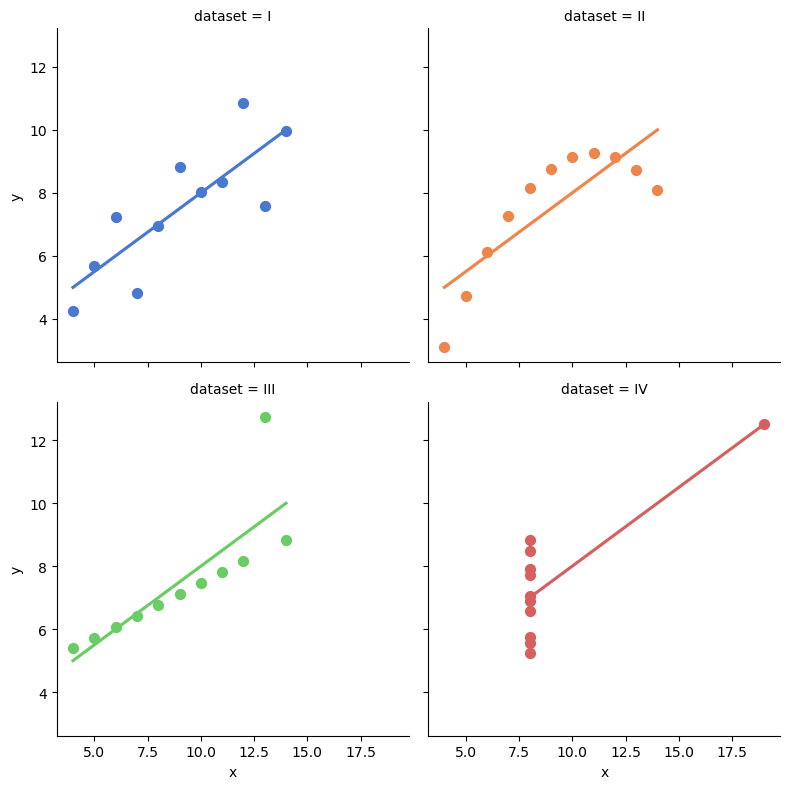

In [6]:
# Show the results of a linear regression within each dataset
sns.lmplot(
    data=data, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)

In [7]:
# separamos el dataset II
data2=data[data['dataset']=='II']
data2

,dataset,x,y
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26
16,II,14.0,8.10
17,II,6.0,6.13
18,II,4.0,3.10
19,II,12.0,9.13
20,II,7.0,7.26


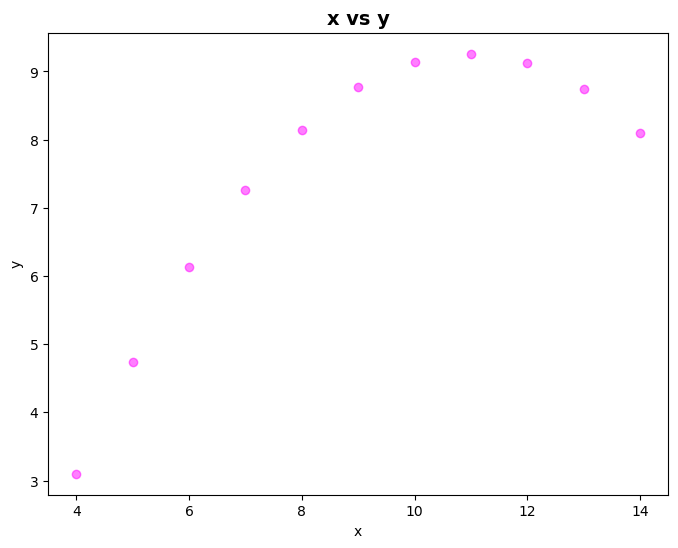

In [8]:
# graficaremos los valores del dataset

fig=plt.figure(figsize=(8,6))
plt.scatter(data2['x'],data2['y'],color="magenta", alpha=0.5)
plt.title("x vs y",fontsize=14,fontweight="bold")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.close()


In [9]:
# Definimos las variables predictoras y dependiente
y=data2.pop('y')
y

11    9.14
12    8.14
13    8.74
14    8.77
15    9.26
16    8.10
17    6.13
18    3.10
19    9.13
20    7.26
21    4.74
Name: y, dtype: float64

In [ ]:
# 🌳 Ahora ponemos a trabajar al arbolito...

# 📌 Paso 1: Instanciamos el modelo
# - Usamos DecisionTreeRegressor, un árbol de decisión para problemas de regresión.
# - random_state = 16 asegura reproducibilidad (el mismo árbol se obtiene siempre).
dt = DecisionTreeRegressor(random_state=16)

# 📌 Paso 2: Preparamos los datos de entrada
# - Tomamos la columna 'x' del dataset (features).
# - La convertimos en DataFrame con .to_frame(), ya que scikit-learn espera 2D.
x_train = data2['x'].to_frame()

# 📌 Paso 3: Entrenamos el modelo
# - fit() ajusta el árbol a los datos (X = x_train, y = valores reales).
dt.fit(x_train, y)

# ✅ En este punto, el árbol ya "aprendió" la relación entre X e Y.
# Luego podemos:
# - Evaluar su desempeño con score().
# - Comparar predicciones vs. datos reales.
# - Graficar para visualizar cómo el árbol segmenta los datos.

"\nclass sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best',\n max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,\n  max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)\n\n"

In [ ]:
# 🎯 Ahora vamos a probar el árbol haciendo predicciones
# - Definimos un conjunto de valores de entrada (x_test).
# - Estos valores no estaban en el entrenamiento: son "nuevos".
x_test = pd.DataFrame([[4.5], [6.5], [8.5], [10.5], [12.5]])

# 📌 Paso 1: Pedimos al árbol que prediga Y para esos X
y_pred = dt.predict(x_test)

# 📌 Paso 2: Mostramos los resultados
print("🔮 Predicciones del árbol para X_test:")
print(y_pred)

[3.1  6.13 8.14 9.14 9.13]


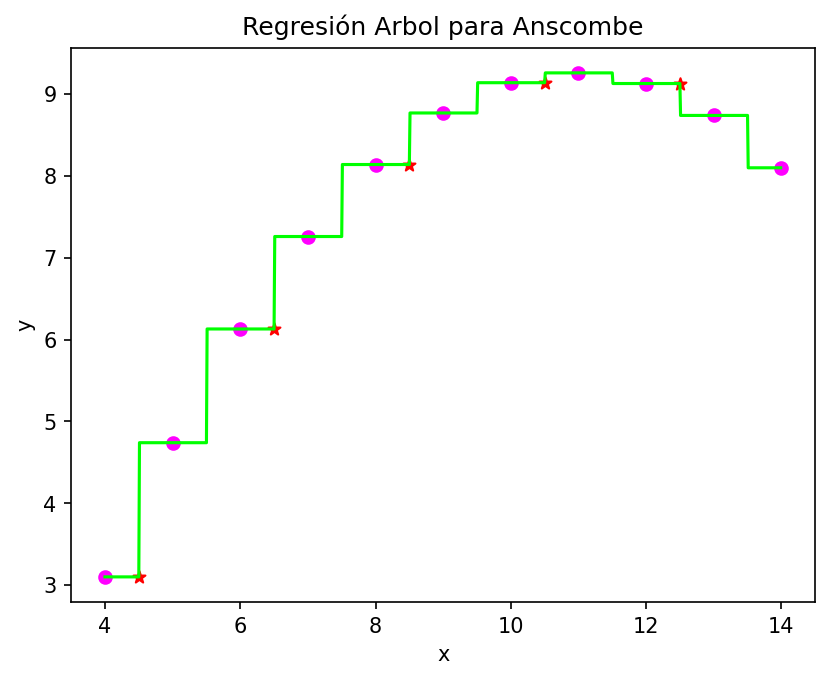

In [ ]:
# 📌 Paso 1: Definimos un rango de valores para graficar la curva del árbol
x_vect = np.arange(4.0, 14., 0.01)        # vector numpy de valores entre 4 y 14 con paso 0.01
x_graf = x_vect.reshape((len(x_vect), 1)) # lo convertimos en matriz (n,1) → formato que espera sklearn

# 📌 Paso 2: Armamos el gráfico
plt.figure(dpi=150)  # inicializamos figura con mayor resolución

# 🔵 Datos originales de entrenamiento
plt.scatter(x_train, y, c='magenta', label="Datos reales")

# 🟢 Curva de predicción del árbol (forma de "escalones")
plt.plot(x_graf, dt.predict(x_graf), color='lime', label="Árbol de regresión")

# 🔴 Predicciones puntuales sobre x_test
plt.scatter(x_test, y_pred, color='red', marker='*', s=120, label="Predicciones")

# 📌 Paso 3: Detalles estéticos
plt.title("🌳 Regresión con Árbol para Anscombe")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

#plt.savefig("anscombe.png", dpi=300)  # (opcional) guardar gráfico como archivo
plt.show()   # mostrar gráfico en notebook
plt.close()  # cerrar figura y liberar memoria


In [13]:
# preguntamos qué tal predice sobre los datos ingresados
print('\n')
print(f'Precisión sobre valores REALES: {dt.score(x_train, y)}')
print(f'Precisión sobre valores PREDICCION: {dt.score(x_graf, dt.predict(x_graf))}')
print('\n')




Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0




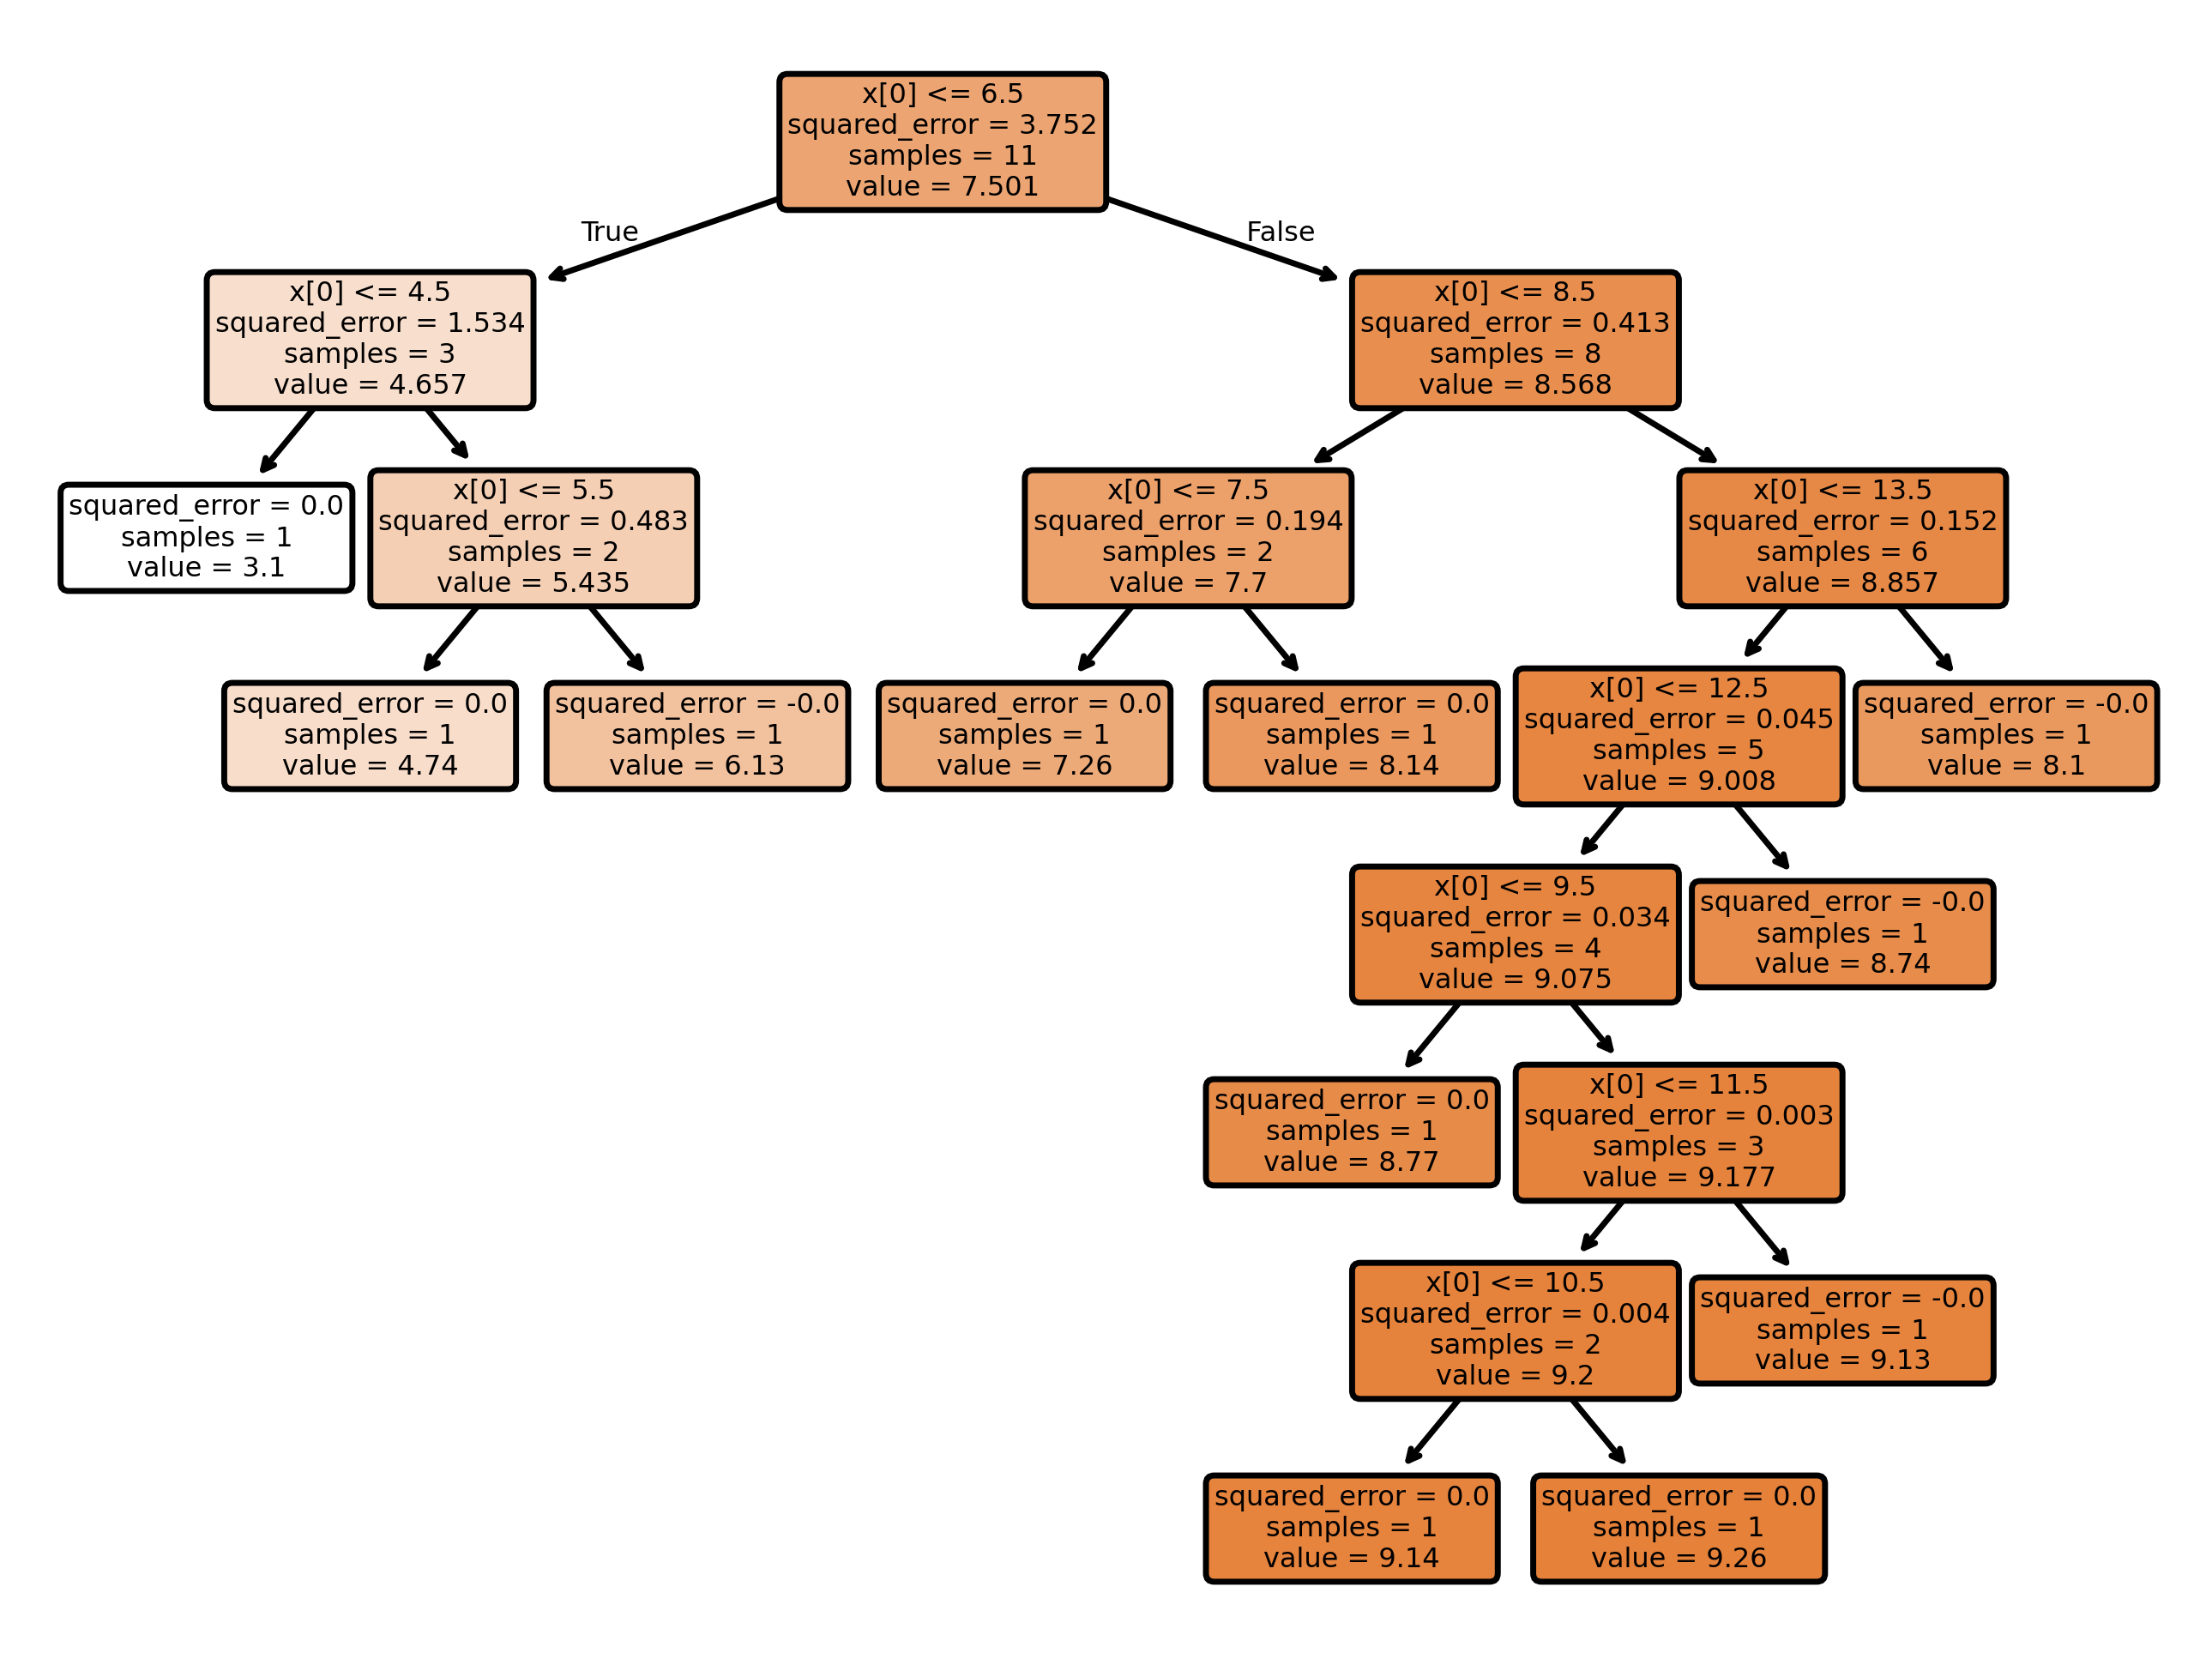

In [14]:
# gráfico del árbol que hace la regresión
plt.figure(dpi=500)
plot_tree(dt, filled=True, rounded=True)
plt.show()
plt.close()